    Text Mining,
    
    1) Extract reviews of any product from ecommerce website like amazon.
    2) Perform emotion mining.

In [1]:
# Importing the required libraries 

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

import string
import re
#!pip install spacy
#!python -m spacy download en_core_web_sm
import spacy

from nltk import tokenize
#!pip install autoscraper
from autoscraper import AutoScraper
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

### Downloading reviews of the product "Apple iPhone 14 Pro" from Amazon website.

In [2]:
# Giving the url of the amazon product reviews
url = "https://www.amazon.in/Apple-iPhone-Pro-128GB-Gold/product-reviews/B0BDJBGBF3/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

w_list = ["Nothing compares to an iPhone."]

In [3]:
# Using AutoScraper to scrap the data from the url
scraper = AutoScraper()
data = scraper.build(url,w_list)
print(data)

['The Good: The software is extremely smooth and stable. Battery life is good and not too exceptional. It’s certainly not as good as 13 Pro Max. The battery is currently lasting me 24 hours instead of 18 hours on my Android. I’d say the 3200mAh from Apple is comparable to a 5500mAh Android battery. The 48MP camera is sharp and fast. The dynamic island is extremely helpful in many situations that involve multitasking. I use it very frequently during calls. The screen is bright and looks very clear even in direct sunlight. Haptics are very unique and delightful. Face id is much easier than a fingerprint scanner. Gone are the days of wiping your fingers. The Safari password manager can save passwords for all sites and authenticate directly with Face Id. The size of the phone 6.1 inch is very comfortable for one hand use and one needn’t shuffle around the phone for one hand use like on 6.7 inch phones.Where Apple really shines is with the ecosystem. My 14 Pro, Series 8 watch and Airpods 3 

In [4]:
data = [x.strip() for x in data] 
data = [x for x in data if x] 
data[1:8]

['After researching about the dealer and reading most of the reviews I decided to buy that n I took this phone to Apple Store they says it’s original one so please guys u can buy this one while selling one of ur kidney 🥲 but it took long time to be delivered n the packing can be improved',
 'Best phone with great camera quality and best performance..Value For Money Product',
 'Prompt delivery: ordered in morning, delivered in the eveningSecured delivery: delivery guy made video of opening of package. We opened package and saw everything things and sealed. Then we let delivery boy to go. Thanks Amazon!',
 'Nothing compares to an iPhone.',
 'Apple was always Apple👌👌👍.  But for secure packaging I gave 1 Star... It looks like ordinary 📦..I received package with 1’’ hole in it by IPhone was Genuine. Thanks 🥲',
 'Well, definitely improved from its predecessor. Smooth and flawless display and is a bit heavy which explains the increased battery capacity. Thanks to Amazon for secure packaging a

In [5]:
comment = tokenize.sent_tokenize(" ".join(data))
comment[:10]

['The Good: The software is extremely smooth and stable.',
 'Battery life is good and not too exceptional.',
 'It’s certainly not as good as 13 Pro Max.',
 'The battery is currently lasting me 24 hours instead of 18 hours on my Android.',
 'I’d say the 3200mAh from Apple is comparable to a 5500mAh Android battery.',
 'The 48MP camera is sharp and fast.',
 'The dynamic island is extremely helpful in many situations that involve multitasking.',
 'I use it very frequently during calls.',
 'The screen is bright and looks very clear even in direct sunlight.',
 'Haptics are very unique and delightful.']

In [6]:
# creating dataframe for the comments list
reviews = pd.DataFrame(comment, columns=["Comment"])
reviews.head(10)

,Comment
0,The Good: The software is extremely smooth and...
1,Battery life is good and not too exceptional.
2,It’s certainly not as good as 13 Pro Max.
3,The battery is currently lasting me 24 hours i...
4,I’d say the 3200mAh from Apple is comparable t...
5,The 48MP camera is sharp and fast.
6,The dynamic island is extremely helpful in man...
7,I use it very frequently during calls.
8,The screen is bright and looks very clear even...
9,Haptics are very unique and delightful.


### Performing EDA on the dataframe

In [7]:
# to get the information of the datafile
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  43 non-null     object
dtypes: object(1)
memory usage: 472.0+ bytes


In [8]:
# summarizing the dataframe
reviews.describe()

,Comment
count,43
unique,43
top,The Good: The software is extremely smooth and...
freq,1


In [9]:
# to check the null values of the data
reviews.isnull().sum()

Comment    0
dtype: int64

## Text Preprocessing 

In [10]:
# preprocessing the column 'Comment' from the dataframe

# removing both leading and trailing characters
reviews=[comment.strip() for comment in reviews.Comment]
reviews=[comment for comment in reviews if comment]
# removes empty strings, which are considered as False in Python
reviews[0:10]

['The Good: The software is extremely smooth and stable.',
 'Battery life is good and not too exceptional.',
 'It’s certainly not as good as 13 Pro Max.',
 'The battery is currently lasting me 24 hours instead of 18 hours on my Android.',
 'I’d say the 3200mAh from Apple is comparable to a 5500mAh Android battery.',
 'The 48MP camera is sharp and fast.',
 'The dynamic island is extremely helpful in many situations that involve multitasking.',
 'I use it very frequently during calls.',
 'The screen is bright and looks very clear even in direct sunlight.',
 'Haptics are very unique and delightful.']

In [11]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[:2000]

'The Good: The software is extremely smooth and stable. Battery life is good and not too exceptional. It’s certainly not as good as 13 Pro Max. The battery is currently lasting me 24 hours instead of 18 hours on my Android. I’d say the 3200mAh from Apple is comparable to a 5500mAh Android battery. The 48MP camera is sharp and fast. The dynamic island is extremely helpful in many situations that involve multitasking. I use it very frequently during calls. The screen is bright and looks very clear even in direct sunlight. Haptics are very unique and delightful. Face id is much easier than a fingerprint scanner. Gone are the days of wiping your fingers. The Safari password manager can save passwords for all sites and authenticate directly with Face Id. The size of the phone 6.1 inch is very comfortable for one hand use and one needn’t shuffle around the phone for one hand use like on 6.7 inch phones.Where Apple really shines is with the ecosystem. My 14 Pro, Series 8 watch and Airpods 3 i

In [12]:
# Removing the punctuations from the string 
punc=reviews_text.translate(str.maketrans('','',string.punctuation)).replace("’", "")
punc[3000:]

' guy made video of opening of package We opened package and saw everything things and sealed Then we let delivery boy to go Thanks Amazon Nothing compares to an iPhone Apple was always Apple👌👌👍 But for secure packaging I gave 1 Star It looks like ordinary 📦I received package with 1 hole in it by IPhone was Genuine Thanks 🥲 Well definitely improved from its predecessor Smooth and flawless display and is a bit heavy which explains the increased battery capacity Thanks to Amazon for secure packaging and quick delivery Battery life ok This is exactly what you would expect from an iPhone All the perks and all the cons  what you see is what you get No surprises hereI wanted a topnotch camera in my pocket to take photos of my 4yearold and so I am happy with this Several things of course could have been better but you wouldnt hear any complaints from me I did enough research on what I am getting into and so no surprises and no disappointments I always had a complaint about sound output of iPh

In [13]:
# Defining a function to remove any kind of emoticons, symbols, flags etc., from the text
import re

def remove_emoji(string):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

no_emoji = remove_emoji(punc)
no_emoji[3000:]

' guy made video of opening of package We opened package and saw everything things and sealed Then we let delivery boy to go Thanks Amazon Nothing compares to an iPhone Apple was always Apple But for secure packaging I gave 1 Star It looks like ordinary I received package with 1 hole in it by IPhone was Genuine Thanks 🥲 Well definitely improved from its predecessor Smooth and flawless display and is a bit heavy which explains the increased battery capacity Thanks to Amazon for secure packaging and quick delivery Battery life ok This is exactly what you would expect from an iPhone All the perks and all the cons  what you see is what you get No surprises hereI wanted a topnotch camera in my pocket to take photos of my 4yearold and so I am happy with this Several things of course could have been better but you wouldnt hear any complaints from me I did enough research on what I am getting into and so no surprises and no disappointments I always had a complaint about sound output of iPhones

In [14]:
# Tokenization
#!pip install -U nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\RAMYA
[nltk_data]     KRISHNA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\RAMYA
[nltk_data]     KRISHNA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_emoji)
print(text_tokens[0:50])

['The', 'Good', 'The', 'software', 'is', 'extremely', 'smooth', 'and', 'stable', 'Battery', 'life', 'is', 'good', 'and', 'not', 'too', 'exceptional', 'Its', 'certainly', 'not', 'as', 'good', 'as', '13', 'Pro', 'Max', 'The', 'battery', 'is', 'currently', 'lasting', 'me', '24', 'hours', 'instead', 'of', '18', 'hours', 'on', 'my', 'Android', 'Id', 'say', 'the', '3200mAh', 'from', 'Apple', 'is', 'comparable', 'to']


In [16]:
# to know the number of tokens
len(text_tokens)

744

In [17]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:200])

['Good', 'software', 'extremely', 'smooth', 'stable', 'Battery', 'life', 'good', 'exceptional', 'Its', 'certainly', 'good', '13', 'Pro', 'Max', 'battery', 'currently', 'lasting', '24', 'hours', 'instead', '18', 'hours', 'Android', 'Id', 'say', '3200mAh', 'Apple', 'comparable', '5500mAh', 'Android', 'battery', '48MP', 'camera', 'sharp', 'fast', 'dynamic', 'island', 'extremely', 'helpful', 'many', 'situations', 'involve', 'multitasking', 'use', 'frequently', 'calls', 'screen', 'bright', 'looks', 'clear', 'even', 'direct', 'sunlight', 'Haptics', 'unique', 'delightful', 'Face', 'id', 'much', 'easier', 'fingerprint', 'scanner', 'Gone', 'days', 'wiping', 'fingers', 'Safari', 'password', 'manager', 'save', 'passwords', 'sites', 'authenticate', 'directly', 'Face', 'Id', 'size', 'phone', '61', 'inch', 'comfortable', 'one', 'hand', 'use', 'one', 'neednt', 'shuffle', 'around', 'phone', 'one', 'hand', 'use', 'like', '67', 'inch', 'phonesWhere', 'Apple', 'really', 'shines', 'ecosystem', 'My', '14',

In [18]:
# Now, Normalize the data
# changing the words to lowercase
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words[:200])

['good', 'software', 'extremely', 'smooth', 'stable', 'battery', 'life', 'good', 'exceptional', 'its', 'certainly', 'good', '13', 'pro', 'max', 'battery', 'currently', 'lasting', '24', 'hours', 'instead', '18', 'hours', 'android', 'id', 'say', '3200mah', 'apple', 'comparable', '5500mah', 'android', 'battery', '48mp', 'camera', 'sharp', 'fast', 'dynamic', 'island', 'extremely', 'helpful', 'many', 'situations', 'involve', 'multitasking', 'use', 'frequently', 'calls', 'screen', 'bright', 'looks', 'clear', 'even', 'direct', 'sunlight', 'haptics', 'unique', 'delightful', 'face', 'id', 'much', 'easier', 'fingerprint', 'scanner', 'gone', 'days', 'wiping', 'fingers', 'safari', 'password', 'manager', 'save', 'passwords', 'sites', 'authenticate', 'directly', 'face', 'id', 'size', 'phone', '61', 'inch', 'comfortable', 'one', 'hand', 'use', 'one', 'neednt', 'shuffle', 'around', 'phone', 'one', 'hand', 'use', 'like', '67', 'inch', 'phoneswhere', 'apple', 'really', 'shines', 'ecosystem', 'my', '14',

In [19]:
# Performing Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

good software extremely smooth stable battery life good exceptional its certainly good 13 pro max battery currently lasting 24 hours instead 18 hours android id say 3200mah apple comparable 5500mah android battery 48mp camera sharp fast dynamic island extremely helpful many situations involve multitasking use frequently calls screen bright looks clear even direct sunlight haptics unique delightful face id much easier fingerprint scanner gone days wiping fingers safari password manager save passwords sites authenticate directly face id size phone 61 inch comfortable one hand use one neednt shuffle around phone one hand use like 67 inch phoneswhere apple really shines ecosystem my 14 pro series 8 watch airpods 3 integrate seamlessly hard find perfection ecosystems used past security device top notch also double edged sword app usage isnt straightforward access internal memory but limitations enforce strong security one simply get data isolation security ios android highly personalized ad

In [20]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['good', 'software', 'extremely', 'smooth', 'stable', 'battery', 'life', 'good', 'exceptional', 'its', 'certainly', 'good', '13', 'pro', 'max', 'battery', 'currently', 'last', '24', 'hour', 'instead', '18', 'hour', 'android', 'i', 'd', 'say', '3200mah', 'apple', 'comparable', '5500mah', 'android', 'battery', '48mp', 'camera', 'sharp', 'fast', 'dynamic', 'island', 'extremely', 'helpful', 'many', 'situation', 'involve', 'multitaske', 'use', 'frequently', 'call', 'screen', 'bright', 'look', 'clear', 'even', 'direct', 'sunlight', 'haptic', 'unique', 'delightful', 'face', 'I', 'd', 'much', 'easy', 'fingerprint', 'scanner', 'go', 'day', 'wipe', 'finger', 'safari', 'password', 'manager', 'save', 'password', 'site', 'authenticate', 'directly', 'face', 'i', 'd', 'size', 'phone', '61', 'inch', 'comfortable', 'one', 'hand', 'use', 'one', 'need', 'not', 'shuffle', 'around', 'phone', 'one', 'hand', 'use', 'like', '67', 'inch', 'phoneswhere', 'apple', 'really', 'shine', 'ecosystem', 'my', '14', 'pro

In [21]:
# to print clean tweets after joining the words
clean_reviews=' '.join(lemmas)
clean_reviews

'good software extremely smooth stable battery life good exceptional its certainly good 13 pro max battery currently last 24 hour instead 18 hour android i d say 3200mah apple comparable 5500mah android battery 48mp camera sharp fast dynamic island extremely helpful many situation involve multitaske use frequently call screen bright look clear even direct sunlight haptic unique delightful face I d much easy fingerprint scanner go day wipe finger safari password manager save password site authenticate directly face i d size phone 61 inch comfortable one hand use one need not shuffle around phone one hand use like 67 inch phoneswhere apple really shine ecosystem my 14 pro series 8 watch airpod 3 integrate seamlessly hard find perfection ecosystem use past security device top notch also double edged sword app usage be not straightforward access internal memory but limitation enforce strong security one simply get data isolation security io android highly personalize ad do not appear use p

## Feature Extraction using CountVectorizer 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
reviews_cv = cv.fit_transform(lemmas)

print(cv.vocabulary_)

{'good': 115, 'software': 251, 'extremely': 100, 'smooth': 250, 'stable': 253, 'battery': 39, 'life': 149, 'exceptional': 97, 'its': 144, 'certainly': 52, '13': 2, 'pro': 207, 'max': 158, 'currently': 63, 'last': 147, '24': 7, 'hour': 129, 'instead': 135, '18': 6, 'android': 25, 'say': 227, '3200mah': 8, 'apple': 31, 'comparable': 55, '5500mah': 11, '48mp': 9, 'camera': 48, 'sharp': 241, 'fast': 102, 'dynamic': 85, 'island': 142, 'helpful': 124, 'many': 157, 'situation': 246, 'involve': 139, 'multitaske': 166, 'use': 280, 'frequently': 109, 'call': 47, 'screen': 229, 'bright': 44, 'look': 154, 'clear': 53, 'even': 93, 'direct': 74, 'sunlight': 260, 'haptic': 120, 'unique': 277, 'delightful': 70, 'face': 101, 'much': 165, 'easy': 86, 'fingerprint': 105, 'scanner': 228, 'go': 114, 'day': 65, 'wipe': 290, 'finger': 104, 'safari': 225, 'password': 188, 'manager': 156, 'save': 226, 'site': 245, 'authenticate': 34, 'directly': 75, 'size': 247, 'phone': 194, '61': 12, 'inch': 133, 'comfortabl

In [23]:
print(cv.get_feature_names()[50:200])

['capacity', 'case', 'certainly', 'clear', 'comfortable', 'comparable', 'compare', 'complain', 'complaint', 'con', 'consider', 'could', 'course', 'currently', 'data', 'day', 'dealer', 'decide', 'defeat', 'definitely', 'delightful', 'deliver', 'delivery', 'device', 'direct', 'directly', 'disappointment', 'dispatch', 'display', 'distracting', 'do', 'doorstep', 'double', 'drain', 'dull', 'dynamic', 'easy', 'ecosystem', 'edged', 'editing', 'either', 'enforce', 'enough', 'even', 'eveningsecured', 'everything', 'exactly', 'exceptional', 'expect', 'explain', 'extremely', 'face', 'fast', 'find', 'finger', 'fingerprint', 'fix', 'flawless', 'for', 'frequently', 'gb', 'genuine', 'get', 'give', 'go', 'good', 'great', 'guy', 'hand', 'happy', 'haptic', 'hard', 'hear', 'heavy', 'helpful', 'herei', 'highly', 'hole', 'honestly', 'hour', 'ideally', 'if', 'improve', 'inch', 'increase', 'instead', 'insteadthe', 'integrate', 'internal', 'involve', 'io', 'iphone', 'island', 'isolation', 'its', 'kidney', 'ki

In [24]:
print(reviews_cv.toarray()[50:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
print(reviews_cv.toarray().shape)

(454, 292)


## Generating Word Cloud 

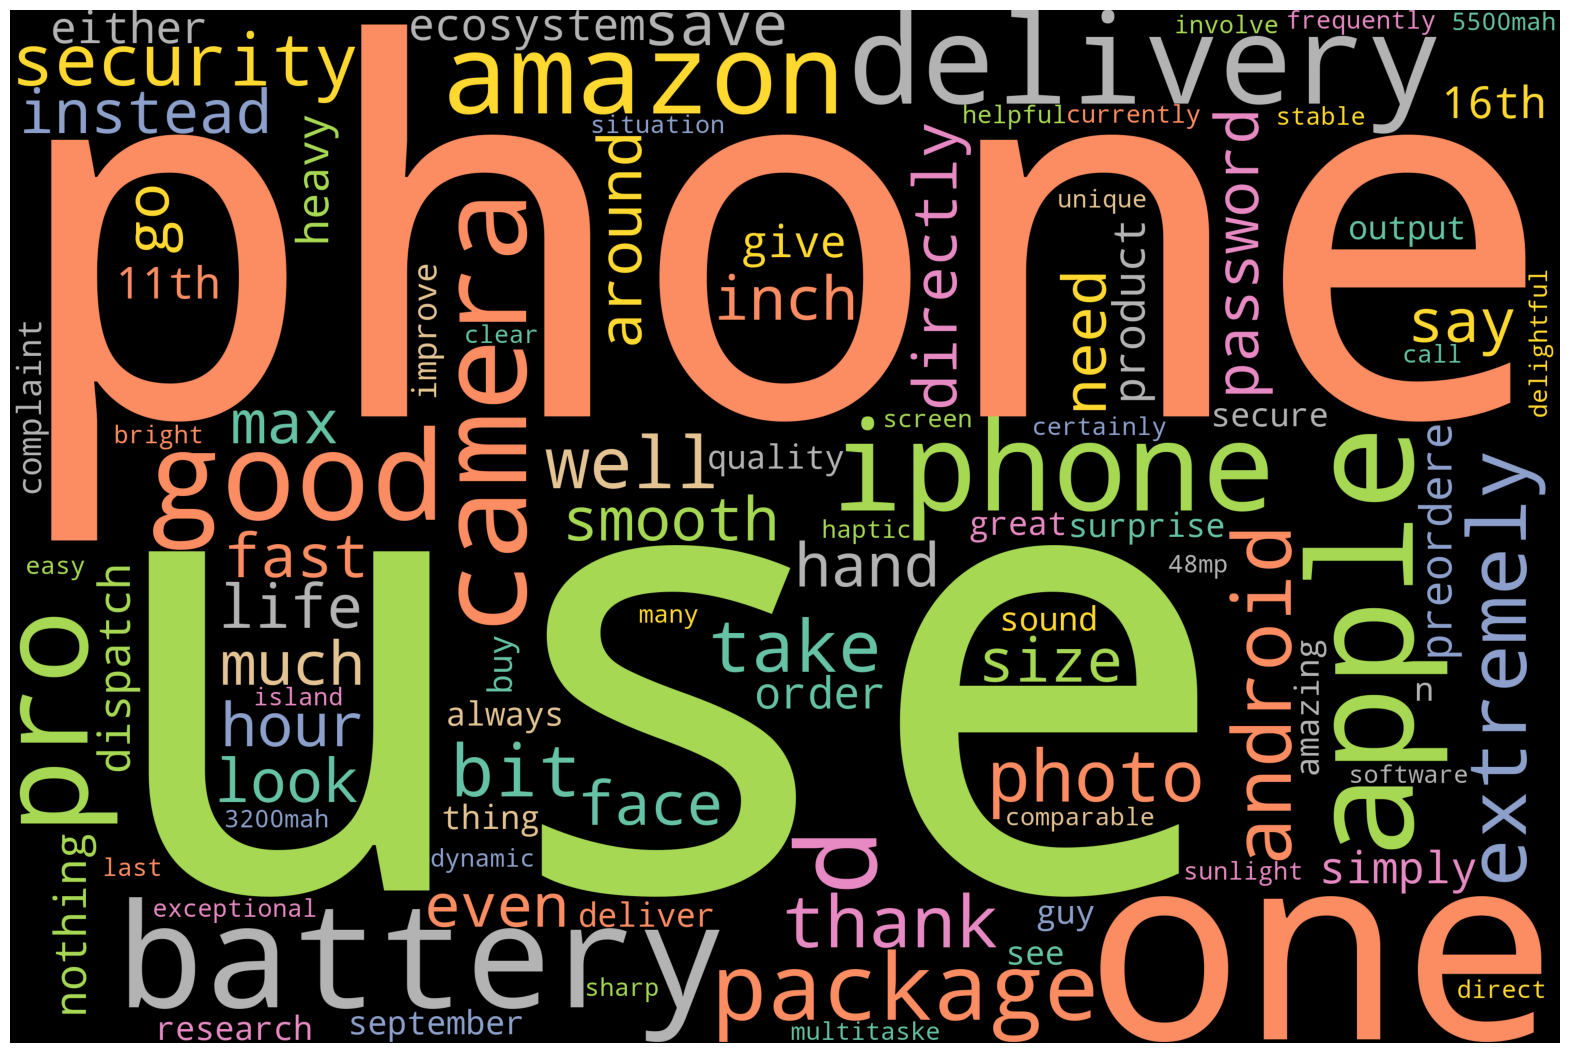

In [26]:
# Defining a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud)
    plt.axis('off')

# To generate the Word Cloud
wordcloud = WordCloud(width=3000,height=2000,background_color='black',max_words=100,
                      colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [27]:
# Parts Of Speech words Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [28]:
for token in doc_block[100:150]:
    print(token,token.pos_)

phoneswhere NOUN
apple NOUN
really ADV
shine VERB
ecosystem NOUN
my PRON
14 NUM
pro ADJ
series NOUN
8 NUM
watch NOUN
airpod ADJ
3 NUM
integrate VERB
seamlessly ADV
hard ADV
find VERB
perfection NOUN
ecosystem NOUN
use NOUN
past ADJ
security NOUN
device NOUN
top ADJ
notch NOUN
also ADV
double ADV
edged ADJ
sword NOUN
app NOUN
usage NOUN
be AUX
not PART
straightforward ADJ
access NOUN
internal ADJ
memory NOUN
but CCONJ
limitation NOUN
enforce VERB
strong ADJ
security NOUN
one PRON
simply ADV
get VERB
data NOUN
isolation NOUN
security NOUN
io NOUN
android NOUN


In [29]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['camera', 'vacation', 'consider', 'power', 'bank', 'switch', 'bit', 'distracting', 'save', 'battery', 'use', 'tap', 'wake', 'insteadthe', 'rant', 'd', 'complain', 'seller', 'give', 'value', 'preorder', 'order', 'phone', '11th', 'iphone', 'apple', 'stock', 'gb', 'arrive', 'amazon', 'be', 'dispatch', '17th', 'defeat', 'purpose', 'apple', 'result', 'product', 'reach', 'doorstep', '16th', 'dispatch', 'research', 'dealer', 'reading', 'review', 'decide', 'buy', 'take', 'phone', 'apple', 'store', 'say', 'guy', 'u', 'buy', 'sell', 'take', 'time', 'deliver', 'packing', 'improve', 'phone', 'camera', 'quality', 'performancevalue', 'money', 'product', 'delivery', 'order', 'morning', 'deliver', 'delivery', 'delivery', 'guy', 'make', 'video', 'opening', 'package', 'open', 'package', 'see', 'thing', 'seal', 'let', 'delivery', 'boy', 'go', 'amazon', 'compare', 'iphone', 'apple', 'apple', 'packaging', 'give', 'star', 'look', 'package', 'hole', 'iphone']


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['Word','Count']
# Viewing top 10 results 
wd_df[0:10]

,Word,Count
0,use,8
1,phone,8
2,battery,7
3,apple,7
4,camera,5
5,iphone,5
6,delivery,5
7,package,4
8,security,3
9,get,3


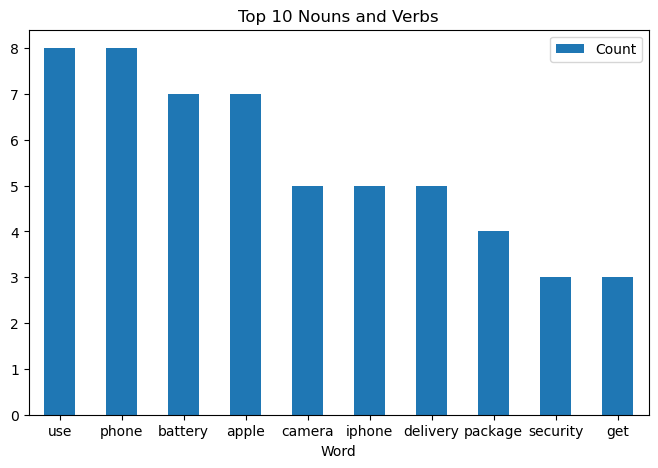

In [31]:
# Visualizing the results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='Word',figsize=(8,5),title='Top 10 Nouns and Verbs',rot=360);

## Sentiment Analysis using Affin

In [32]:
# Emotion Lexicon - Affin
affin = pd.read_csv("Afinn.csv",encoding="Latin1")
affin.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [33]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

affin_score = affin.set_index("word")["value"].to_dict()
take(20, affin_score.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [34]:
'''Creating function; score each word in a sentence in lemmatised form,
   but calculate the score for the whole original sentence'''

nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affin_score

def calculate_sentiment(text: str=None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [35]:
reviews = pd.DataFrame(comment, columns=["Comment"])
reviews.head(10)

,Comment
0,The Good: The software is extremely smooth and...
1,Battery life is good and not too exceptional.
2,It’s certainly not as good as 13 Pro Max.
3,The battery is currently lasting me 24 hours i...
4,I’d say the 3200mAh from Apple is comparable t...
5,The 48MP camera is sharp and fast.
6,The dynamic island is extremely helpful in man...
7,I use it very frequently during calls.
8,The screen is bright and looks very clear even...
9,Haptics are very unique and delightful.


In [36]:
# calculating sentiment score for each sentence
reviews["sentiment_score"] = reviews["Comment"].apply(calculate_sentiment)

# to get the count of words in a sentence
reviews["Word_count"] = reviews["Comment"].str.split().apply(len)
reviews.head()

,Comment,sentiment_score,Word_count
0,The Good: The software is extremely smooth and...,5,9
1,Battery life is good and not too exceptional.,3,8
2,It’s certainly not as good as 13 Pro Max.,3,9
3,The battery is currently lasting me 24 hours i...,0,15
4,I’d say the 3200mAh from Apple is comparable t...,0,13


In [37]:
# Sorting by sentiment_score 
reviews.sort_values(by="sentiment_score")

,Comment,sentiment_score,Word_count
41,I did enough research on what I am getting int...,-4,17
21,If you don’t have a basic skill for photo edit...,-2,33
16,App usage isn’t very straightforward such as n...,-1,13
14,"My 14 Pro, Series 8 watch and Airpods 3 integr...",-1,29
31,Apple was always Apple👌👌👍.,0,4
30,Nothing compares to an iPhone.,0,5
28,Then we let delivery boy to go.,0,7
27,We opened package and saw everything things an...,0,9
24,I ordered my phone on 11th (iPhone 14 Pro was ...,0,40
40,Several things of course could have been bette...,0,16


In [38]:
# Discription of the sentiment_score of the whole review
reviews['sentiment_score'].describe()

count    43.000000
mean      1.534884
std       2.922400
min      -4.000000
25%       0.000000
50%       0.000000
75%       2.000000
max      12.000000
Name: sentiment_score, dtype: float64

In [39]:
# to get negative sentiment score of the whole review
reviews[reviews['sentiment_score']<=0].head()

,Comment,sentiment_score,Word_count
3,The battery is currently lasting me 24 hours i...,0,15
4,I’d say the 3200mAh from Apple is comparable t...,0,13
5,The 48MP camera is sharp and fast.,0,7
7,I use it very frequently during calls.,0,7
9,Haptics are very unique and delightful.,0,6


In [40]:
# to get positive sentiment score of the whole review
reviews[reviews['sentiment_score']>0].head()

,Comment,sentiment_score,Word_count
0,The Good: The software is extremely smooth and...,5,9
1,Battery life is good and not too exceptional.,3,8
2,It’s certainly not as good as 13 Pro Max.,3,9
6,The dynamic island is extremely helpful in man...,2,12
8,The screen is bright and looks very clear even...,2,12


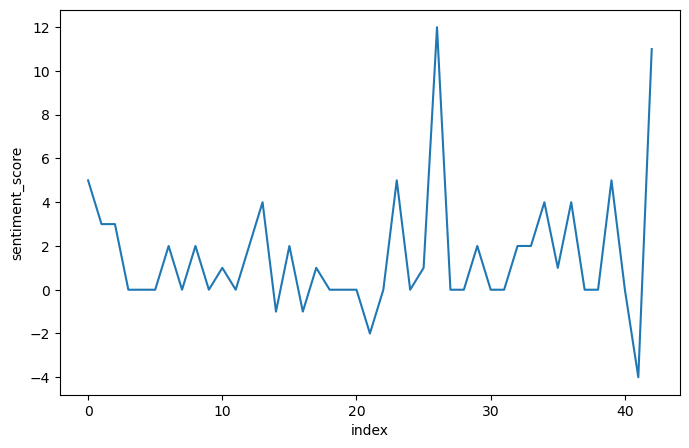

In [41]:
# Plotting the lineplot to get sentiment value of whole review
reviews['index']=range(0,len(reviews))
plt.figure(figsize=(8, 5))
sns.lineplot(y='sentiment_score',x='index',data=reviews);

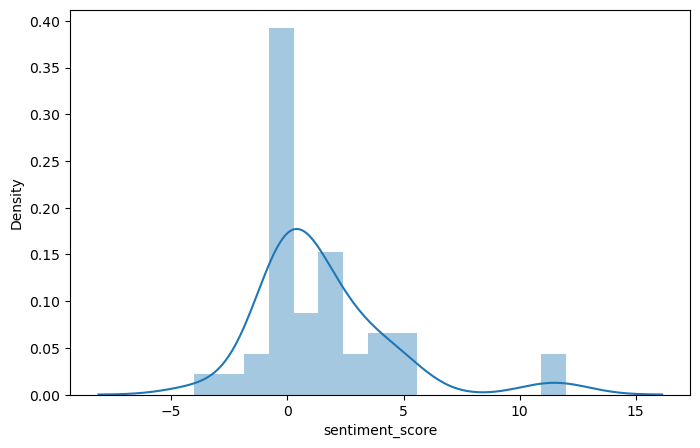

In [42]:
# Plotting the sentiment value for the whole review
plt.figure(figsize=(8,5))
sns.distplot(reviews['sentiment_score']);

## Conclusion:

From the above distplot we can conclude that the number of reviews with negative sentiment score are slightly more than the number of reviews with positive sentiment score.